# **Import Libraries and modules**

**Iteration 4: Reducing OverFitting and further optimization**

Changes:
*   Added Dropout
*   LR Scheduler
*   Batch Size

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


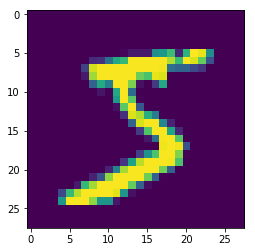

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Dropout(0.1)) # change 1

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1)) # change 1

model.add(Convolution2D(10, 1, 1, activation='relu')) # 12
model.add(MaxPooling2D(pool_size=(2, 2))) # 12

model.add(Convolution2D(16, 3, 3, activation='relu')) # 10
model.add(BatchNormalization())
model.add(Dropout(0.1)) # change 1

model.add(Convolution2D(20, 3, 3, activation='relu')) # 8
model.add(BatchNormalization())
model.add(Dropout(0.1)) # change 1

model.add(Convolution2D(12, 1, 1, activation='relu')) # 8

model.add(Convolution2D(16, 3, 3, activation='relu')) # 6
model.add(BatchNormalization())
model.add(Dropout(0.1)) # change 1

model.add(Convolution2D(20, 3, 3, activation='relu')) # 4
model.add(BatchNormalization())
model.add(Dropout(0.1)) # change 1


model.add(Convolution2D(10, 1, activation='relu')) #4
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)        170       
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10) # change 2

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.003), 
              metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)]) # change 3: batch size

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 9s 146us/step - loss: 0.2626 - acc: 0.9168 - val_loss: 0.0647 - val_acc: 0.9808
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0723 - acc: 0.9779 - val_loss: 0.0515 - val_acc: 0.9836
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0561 - acc: 0.9830 - val_loss: 0.0394 - val_acc: 0.9872
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0490 - acc: 0.9848 - val_loss: 0.0338 - val_acc: 0.9893
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [======

In [14]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)]) # change 3: batch size

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
 1536/60000 [..............................] - ETA: 6s - loss: 0.0225 - acc: 0.9922

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 7s 112us/step - loss: 0.0489 - acc: 0.9846 - val_loss: 0.0331 - val_acc: 0.9893
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0327 - acc: 0.9897 - val_loss: 0.0274 - val_acc: 0.9928
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0274 - acc: 0.9909 - val_loss: 0.0362 - val_acc: 0.9893
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0265 - acc: 0.9919 - val_loss: 0.0264 - val_acc: 0.9920
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0232 - acc: 0.9928 - val_loss: 0.0249 - val_acc: 0.9923
Epoch 6/20

Epoch 000

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
print(score)

[0.02231637185366817, 0.9934]


In [0]:
y_pred = model.predict(X_test)

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[1.83772806e-11 3.57052379e-08 7.78399567e-09 2.98558405e-08
  5.08980539e-14 6.35736862e-12 5.74878151e-17 9.99999881e-01
  5.77542571e-12 2.00230854e-09]
 [1.70709598e-08 1.08564136e-05 9.99988675e-01 2.65731631e-10
  6.76443734e-10 9.01937379e-12 5.20680089e-07 1.02130644e-10
  8.03431655e-10 1.28298032e-11]
 [1.51847895e-10 9.99997258e-01 4.03865030e-09 5.14858423e-09
  1.41751514e-06 7.33603267e-09 4.27669775e-08 1.29014290e-06
  1.84994331e-08 1.75054939e-08]
 [9.99978781e-01 1.27259564e-10 5.16543928e-08 1.68585684e-11
  2.57535326e-09 3.48753781e-09 2.11604129e-05 3.77006065e-11
  1.00990871e-09 5.45658985e-09]
 [6.05993200e-10 7.14458892e-08 2.89780022e-09 3.25559295e-13
  9.99850512e-01 1.39737125e-10 2.90354157e-10 4.98883821e-07
  1.85050386e-09 1.48846622e-04]
 [5.08767084e-10 9.99996066e-01 2.60861999e-09 4.48236870e-09
  2.34471077e-06 3.47572437e-09 1.97696313e-08 1.43577597e-06
  3.04375511e-08 4.11326262e-08]
 [2.22944482e-10 5.35582694e-06 3.45167028e-09 1.72490536e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

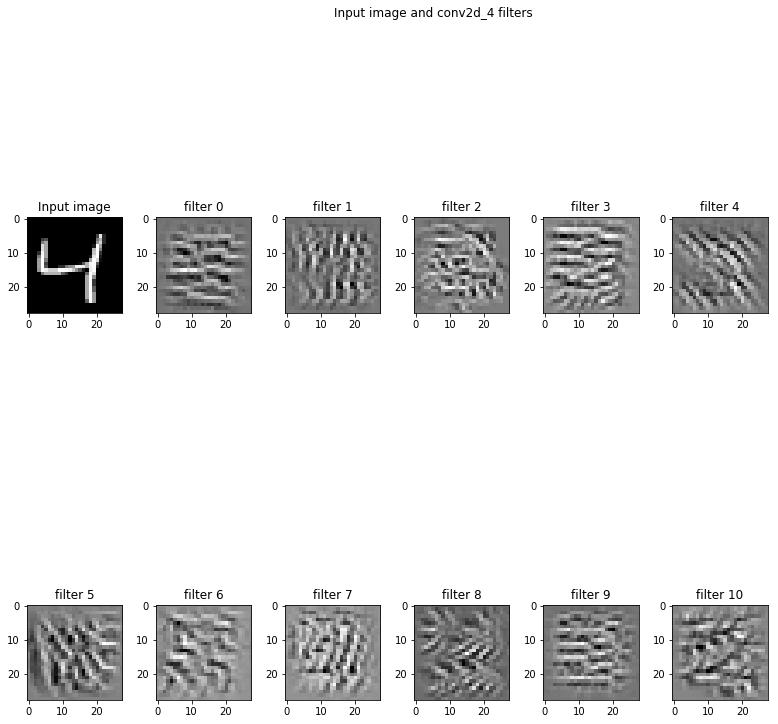

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()